# Lending Club Default Analysis
#### Batch ID : 4705
#### Group Members : Samidh Bhagwat + Archishman Gantait


### Data Understanding + Data Cleaning and Manipulation 

In [16]:
#Below are few libraries needed to perform EDA and visualize data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import warnings
import seaborn as sea
import datetime as dt

In [261]:
#The csv while reading throws error / warning hence a warning ingore statement has been added
warnings.filterwarnings('ignore')
raw_data = pd.read_csv('C:/Users/agantait/Downloads/LendingClubCaseStudy/loan.csv')

#### 1. Fix Row Check / Fix Column Check / Filter Data / Standardizing Values and datatype :  <font color='blue'>DONE</font>

In [284]:
print("size of data : " + str(raw_data.shape)) # get the shape of the data frame
print("\n1st row 1st 6 columns\n " + str(raw_data.iloc[:1, :6])) # check for few columns in 1st row as header check
print("\nlast row 1st 6 columns\n " + str(raw_data.iloc[-1:,:6])) # check for few columns in last row as footer check
raw_data = raw_data.dropna(axis=0, how="all") #remove records where all column values are null / na
print(raw_data['loan_status'].unique()) # check on a low cardinality column if any column number indicators / blank rows are present 
print("duplicate row count :" + str(len(raw_data[raw_data.duplicated()])))
print("size of data post operation: " + str(raw_data.shape)) # get the shape of the data frame

size of data : (39717, 111)

1st row 1st 6 columns
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term
0  1077501    1296599       5000         5000           4975.0   36 months

last row 1st 6 columns
           id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term
39716  87023      86999       7500         7500            800.0   36 months
['Fully Paid' 'Charged Off' 'Current']
duplicate row count :0
size of data post operation: (39717, 111)


In [285]:
#since people with loan_status = 'Current' cannot be considered as defaulters removing them from analysis
refined_data = raw_data[raw_data['loan_status']!='Current']
refined_data.shape

(38577, 111)

In [286]:
print("Columns withn null/Na : "+str(len(refined_data.columns[refined_data.isna().all()])))
refined_data.columns[refined_data.isna().all()]

Columns withn null/Na : 55


Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
     

In [291]:
#Deleting Na columns
refined_data = refined_data.dropna(axis=1, how="all")
print("remaining column count : " +str(len(refined_data.columns)))
refined_data.columns

remaining column count : 56


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='o

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


##### There can be 2 types of columns in the file
###### Type 1 : columns that can be populated before loan approval <font color='green'>(Should ne used for EDA)</font>
###### Type 2 : columns that can be populated after loan approval <font color='red'>(can be ignored for EDA)</font>

In [356]:
# removing type 2 columns
refined_data_eda = refined_data.copy()
refined_data_eda.drop(['application_type'],axis=1, inplace=True)
refined_data_eda.drop(['delinq_2yrs'],axis=1, inplace=True)
refined_data_eda.drop(['collection_recovery_fee'],axis=1, inplace=True)
refined_data_eda.drop(['earliest_cr_line'],axis=1, inplace=True)
refined_data_eda.drop(['inq_last_6mths'],axis=1, inplace=True)
refined_data_eda.drop(['last_credit_pull_d'],axis=1, inplace=True)
refined_data_eda.drop(['last_pymnt_amnt'],axis=1, inplace=True)
refined_data_eda.drop(['last_pymnt_d'],axis=1, inplace=True)
refined_data_eda.drop(['open_acc'],axis=1, inplace=True)
refined_data_eda.drop(['out_prncp'],axis=1, inplace=True)
refined_data_eda.drop(['out_prncp_inv'],axis=1, inplace=True)
refined_data_eda.drop(['pub_rec'],axis=1, inplace=True)
refined_data_eda.drop(['revol_bal'],axis=1, inplace=True)
refined_data_eda.drop(['revol_util'],axis=1, inplace=True)
refined_data_eda.drop(['recoveries'],axis=1, inplace=True)
refined_data_eda.drop(['total_acc'],axis=1, inplace=True)
refined_data_eda.drop(['total_pymnt'],axis=1, inplace=True)
refined_data_eda.drop(['total_pymnt_inv'],axis=1, inplace=True)
refined_data_eda.drop(['total_rec_prncp'],axis=1, inplace=True)
refined_data_eda.drop(['total_rec_int'],axis=1, inplace=True)
refined_data_eda.drop(['total_rec_late_fee'],axis=1, inplace=True)


In [357]:
# check the cardinality in the columns
refined_data_eda.nunique().sort_values()

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv             

In [358]:
# Since columns with unique values / columns having only 1 value / text descriptions are not preferable dropping these from EDA
refined_data_eda.drop(['pymnt_plan'],axis=1, inplace=True)
refined_data_eda.drop(['delinq_amnt'],axis=1, inplace=True)
refined_data_eda.drop(['chargeoff_within_12_mths'],axis=1, inplace=True)
refined_data_eda.drop(['policy_code'],axis=1, inplace=True)
refined_data_eda.drop(['collections_12_mths_ex_med'],axis=1, inplace=True)
refined_data_eda.drop(['initial_list_status'],axis=1, inplace=True)
refined_data_eda.drop(['acc_now_delinq'],axis=1, inplace=True)
refined_data_eda.drop(['tax_liens'],axis=1, inplace=True)

# dropping url and member_id , but keeping id for now
refined_data_eda.drop(['url','member_id'],axis=1, inplace=True)

# dropping title and desc and emp_title as they are not much valuable for EDA
refined_data_eda.drop(columns=['desc','title','emp_title'],inplace=True)

In [359]:
refined_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   loan_amnt               38577 non-null  int64  
 2   funded_amnt             38577 non-null  int64  
 3   funded_amnt_inv         38577 non-null  float64
 4   term                    38577 non-null  object 
 5   int_rate                38577 non-null  object 
 6   installment             38577 non-null  float64
 7   grade                   38577 non-null  object 
 8   sub_grade               38577 non-null  object 
 9   emp_length              37544 non-null  object 
 10  home_ownership          38577 non-null  object 
 11  annual_inc              38577 non-null  float64
 12  verification_status     38577 non-null  object 
 13  issue_d                 38577 non-null  object 
 14  loan_status             38577 non-null  obj

In [360]:
# mths_since_last_delinq  and mths_since_last_record  have 50% null data hence dropping them
refined_data_eda.drop(['mths_since_last_delinq'],axis=1, inplace=True)
refined_data_eda.drop(['mths_since_last_record'],axis=1, inplace=True)


In [361]:
refined_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose               38

#### Ordered categorical : issue_d  , loan_status   

#### Unordered categorical : grade , sub_grade , home_ownership , verification_status , purpose  

#### Quantitative Variable : loan_amnt , funded_amnt , funded_amnt_inv , term , int_rate , installment , annual_inc  , dti  , pub_rec_bankruptcies    

#### Others : zip_code , addr_state  , id    

In [362]:
print(refined_data_eda.head(2))

        id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   

  verification_status issue_d  loan_status      purpose zip_code addr_state  \
0            Verified  Dec-11   Fully Paid  credit_card    860xx         AZ   
1     Source Verified  Dec-11  Charged Off          car    309xx         GA   

     dti  pub_rec_bankruptcies  
0  27.65                   0.0  
1   1.00                   0.0  


In [363]:
#converting term to numeric format
refined_data_eda['term'] = refined_data_eda['term'].apply(lambda x: x.strip().split()[0])
refined_data_eda = refined_data_eda.astype({'term':'int64'})

#converting int_rate to decimal/float
refined_data_eda['int_rate'] = refined_data_eda['int_rate'].apply(lambda x: x.strip('%'))
refined_data_eda = refined_data_eda.astype({'int_rate':'float'})

# changing the datatype of loan_amnt and funded_amnt to flot64 in sync with funded_amnt_inv
refined_data_eda = refined_data_eda.astype({'loan_amnt':'float','funded_amnt':'float'})
refined_data_eda.info()

# rounding off these float columns 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti'
refined_data_eda['loan_amnt'] = refined_data_eda['loan_amnt'].apply(lambda x: round(x,2))
refined_data_eda['funded_amnt'] = refined_data_eda['funded_amnt'].apply(lambda x: round(x,2))
refined_data_eda['funded_amnt_inv'] = refined_data_eda['funded_amnt_inv'].apply(lambda x: round(x,2))
refined_data_eda['int_rate'] = refined_data_eda['int_rate'].apply(lambda x: round(x,2))
refined_data_eda['dti'] = refined_data_eda['dti'].apply(lambda x: round(x,2))

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  float64
 2   funded_amnt           38577 non-null  float64
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  int64  
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose               38

In [368]:
#changing data type of issue_d`to date 
refined_data_eda['issue_d'] = pd.to_datetime(refined_data_eda.issue_d, format='%b-%y')

In [380]:
refined_data_eda.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [374]:
#removing records where emp_length or pub_rec_bankruptcies is null as they are incomplete information for EDA
refined_data_eda= refined_data_eda[refined_data_eda['emp_length'].notna()]
refined_data_eda= refined_data_eda[refined_data_eda['pub_rec_bankruptcies'].notna()]

In [387]:
#changing emp_length to a preferable numeric format 
refined_data_eda = refined_data_eda.astype({'emp_length':'str'})
refined_data_eda['emp_length']=refined_data_eda['emp_length'].apply(lambda x : x.strip("years"))
refined_data_eda['emp_length']=refined_data_eda['emp_length'].apply(lambda x : x.strip("<"))
refined_data_eda['emp_length']=refined_data_eda['emp_length'].apply(lambda x : x.replace(" ", ""))
refined_data_eda['emp_length']=refined_data_eda['emp_length'].apply(lambda x : x.replace("+", ""))

In [388]:
refined_data_eda.shape

(36847, 20)

In [389]:
refined_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  float64       
 2   funded_amnt           36847 non-null  float64       
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   sub_grade             36847 non-null  object        
 9   emp_length            36847 non-null  object        
 10  home_ownership        36847 non-null  object        
 11  annual_inc            36847 non-null  float64       
 12  verification_status   36847 non-null  object        
 13  issue_d              

In [391]:
print(refined_data_eda['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


### Adding Derived Columns

In [392]:
# deriving columns from issues date
refined_data_eda['issue_year']=pd.DatetimeIndex(refined_data_eda['issue_d']).year
refined_data_eda['issue_month']=pd.DatetimeIndex(refined_data_eda['issue_d']).month

(36847, 22)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

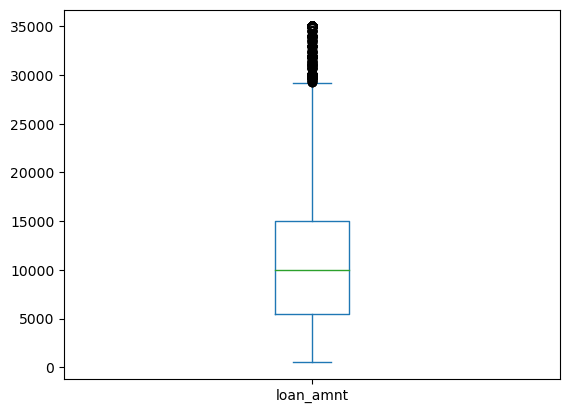

In [394]:
print(refined_data_eda.shape)
print(refined_data_eda["loan_amnt"].describe())
refined_data_eda['loan_amnt'].plot(kind='box')